En este ejercicio resolveremos un ejercicio de regresion lineal, en el que utilizamos un dataset que contiene las caracteristicas de unas casas y su precio en dolares. En esta ocasion NO vamos a clasificar, haremos regresion, el objetivo es averiguar el precio de la casa a partir de sus caracteristicas.

In [1]:
import numpy as np
from keras.datasets import boston_housing
import pandas as pd
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
train_data[0]  #vemos que los valores estan muy distantes unos de otros, esto nos sugiere que debemos normalizarlos

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_labels[0]

15.2

Normalizar: restar la media y dividir por las desviacion estandar

In [ ]:
mean=train_data.mean(axis=0)
train_data=train_data - mean
std=train_data.std(axis=0)
train_data=train_data / std

test_data=test_data - mean
test_data=test_data / std

Para crear esta red neuronal implementaremos una funcion que sea capaz de entregar modelos de datos, porque de ahora en adelante no se evaluara solo sobre un set de entrenamiento sino que se rotara todo el set de validacion en todo el set de entrenamiento con cross_validation o kfold_validation.

In [34]:
def build_model_regression(lr_var, input_data):
  model=models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])
  return model

kfold_validation: ahora vamos a iterar el set de validacion en el set de entrenamiento, no queremos una validacion fija, queremos que esta cambie 

In [35]:
k = 4
num_val_samples=len(train_data) // k
num_epoch=500
all_history=[]

In [36]:
for i in range(k):
  print('Fold:', i)
  val_data=train_data[i*num_val_samples : (i+1)* num_val_samples]
  val_targets=train_labels[i*num_val_samples : (i+1)* num_val_samples]

  partial_train_data=np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]
       ],
       axis=0)
  
  partial_train_targets=np.concatenate(
      [train_labels[:i * num_val_samples],
       train_labels[(i+1) * num_val_samples:]
       ],
       axis=0)
  
  model=build_model_regression(0.001,13)
  history=model.fit(partial_train_data,partial_train_targets,
                    epochs=num_epoch,
                    batch_size=16,
                    validation_data=(val_data, val_targets),
                    verbose=0)
  
  all_history.append(history.history['val_mae'])

Fold: 0


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fold: 1
Fold: 2
Fold: 3


In [37]:
all_mae_avg=pd.DataFrame(all_history).mean(axis=0)
all_mae_avg

0      8.544810
1      9.943049
2      8.060919
3      8.954571
4      5.718317
         ...   
495    3.414894
496    3.397395
497    3.074443
498    3.446004
499    3.097821
Length: 500, dtype: float64

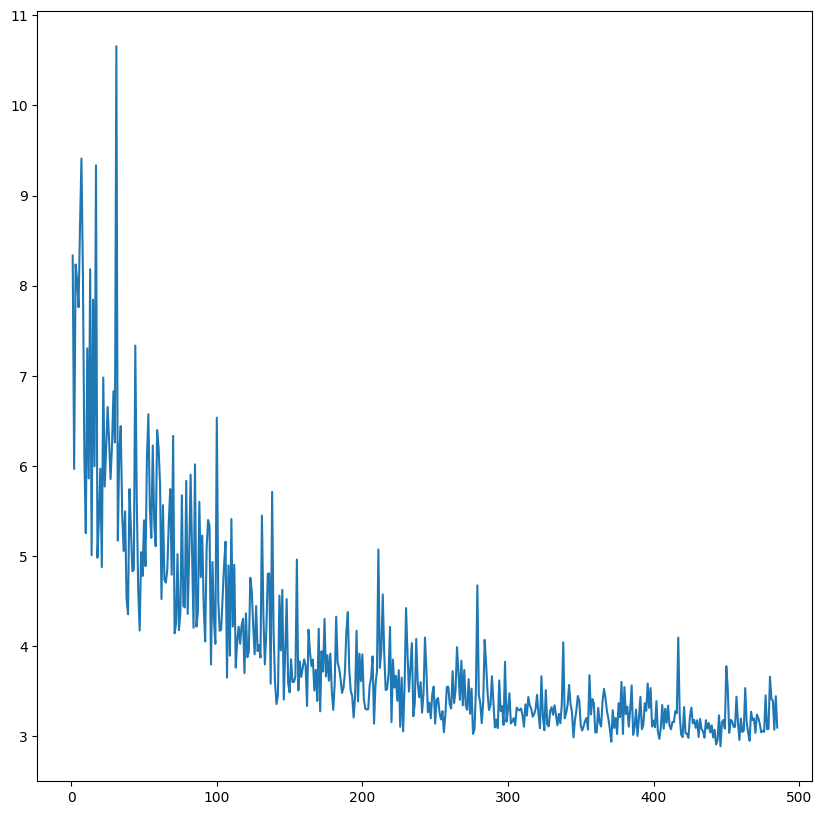

In [38]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [39]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 21.7429 - mae: 3.1320


[21.742860794067383, 3.132006883621216]